<a href="https://colab.research.google.com/github/Alan-Bravo-Tec/Time-Lines-Data-Mining--Python/blob/main/20261_MD_1910_07SeriesDeTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Series de tiempo
#Bravo Tecorral Alan Daniel

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller, kpss

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA

In [2]:
url = 'https://raw.githubusercontent.com/omarmendoza564/datos/main/datos/data_nybirths.dat'
births = pd.read_csv(url, header=None, names=['Births'])
births

,Births
0,26.663
1,23.598
2,26.931
3,24.740
4,25.806
...,...
163,30.000
164,29.261
165,29.012
166,26.992


In [3]:
#convertir el data frame en una serie de tiempo
births. index = pd.date_range('1946-01', periods=len(births), freq='ME')

births

,Births
1946-01-31,26.663
1946-02-28,23.598
1946-03-31,26.931
1946-04-30,24.740
1946-05-31,25.806
...,...
1959-08-31,30.000
1959-09-30,29.261
1959-10-31,29.012
1959-11-30,26.992


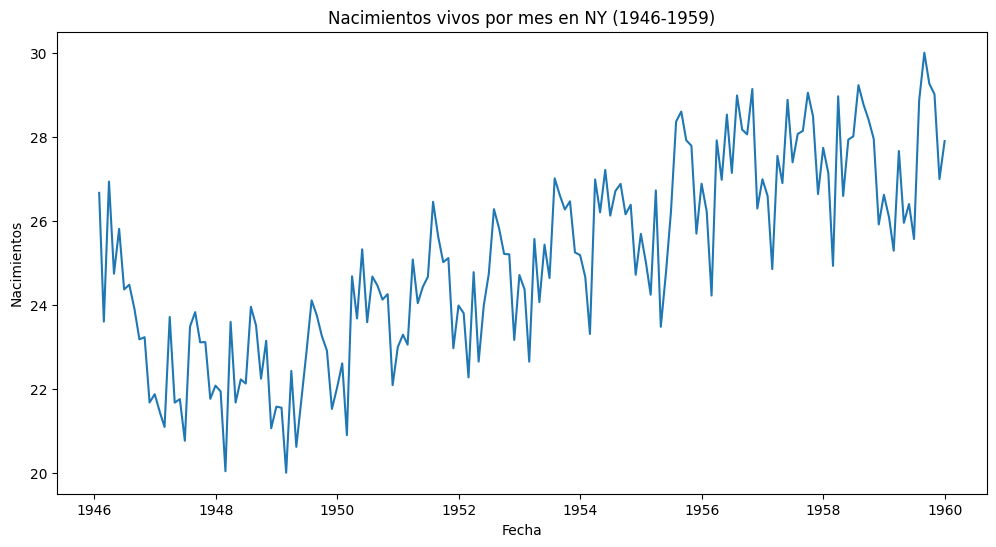

In [4]:
#Graficar serie de tiempo
plt.figure(figsize=(12,6))

plt.plot(births.index, births.Births)

plt.xlabel('Fecha')

plt.ylabel('Nacimientos')

plt.title('Nacimientos vivos por mes en NY (1946-1959)')
plt.show()

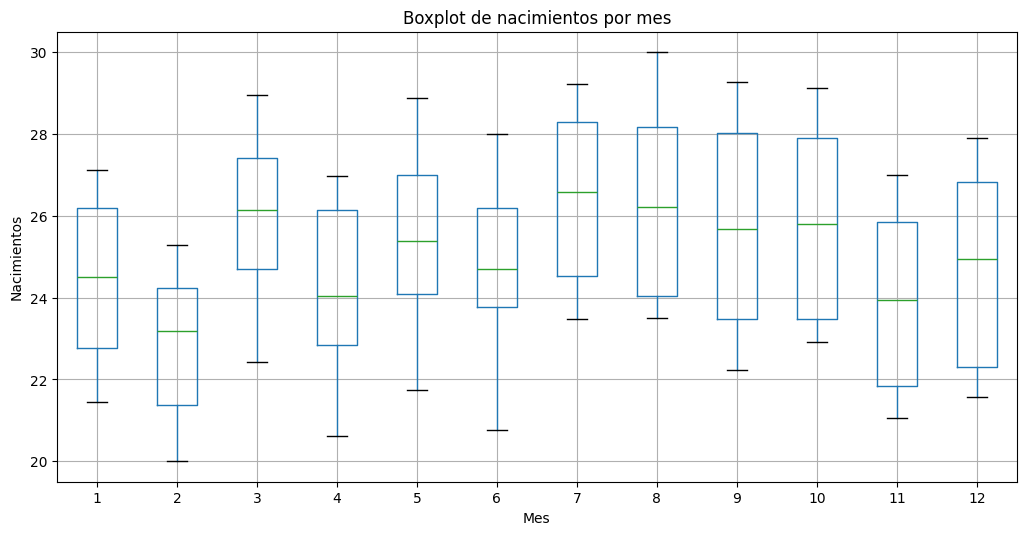

In [5]:
#bloxplot de nacimientos por mes
births ['Month'] = births.index.month

births.boxplot(column='Births', by='Month', figsize=(12,6))

plt.xlabel('Mes')

plt.ylabel('Nacimientos')

plt.title('Boxplot de nacimientos por mes')
plt.suptitle ('')
plt.show()

<Figure size 1200x800 with 0 Axes>

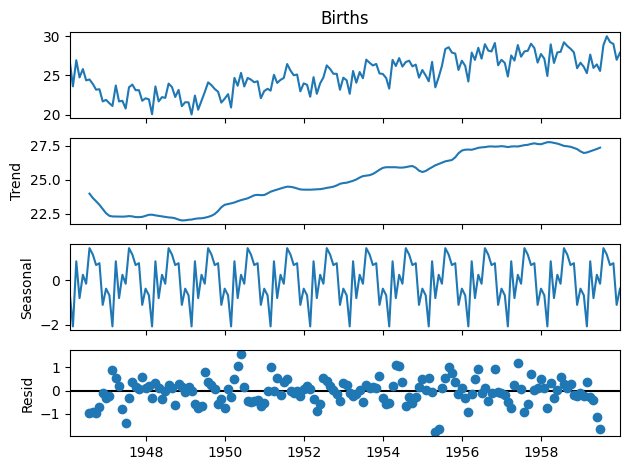

In [6]:
#Ver los componentes de la serie de tiempo (descomposición)
#Tendencia, estacionalidad y residuos
plt.figure(figsize=(12, 8))
decomposition = seasonal_decompose(births.Births, model='additive', period=12)
decomposition.plot()
plt.show()

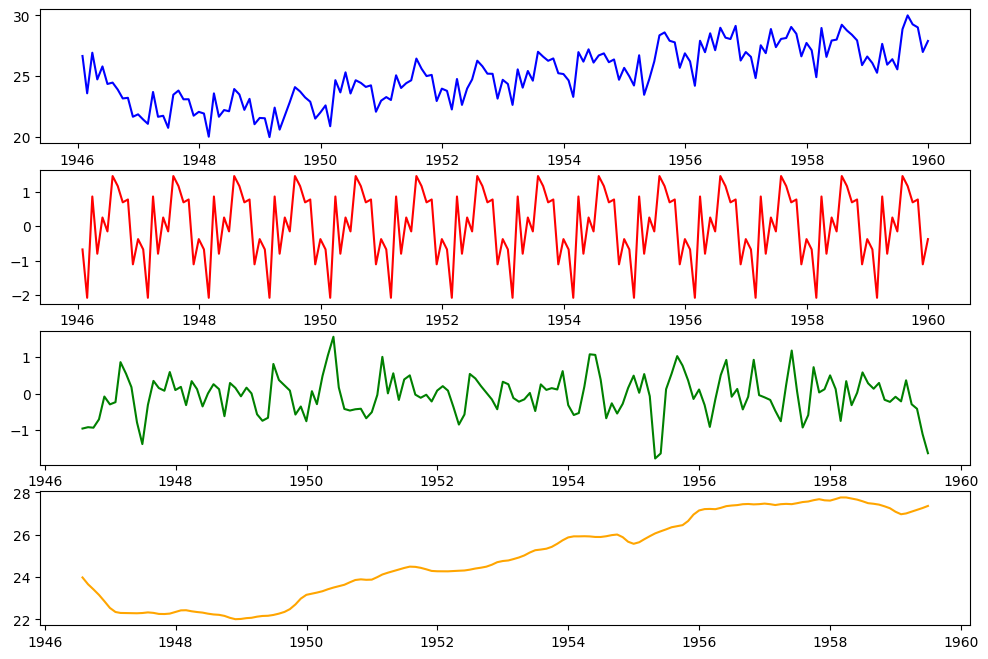

In [7]:

plt.figure(figsize=(12, 8))

plt.subplot(411)

plt.plot(decomposition.observed, label='Original', color ='blue')

plt.subplot(412)

plt.plot(decomposition.seasonal, label='Estacional', color ='red')

plt.subplot(413)

plt.plot(decomposition.resid, label='Residual', color ='green')

plt.subplot(414)

plt.plot(decomposition.trend, label='Residual', color ='orange')

In [8]:
#Prueba de estacionariedad (ADF)

#Si p < 0.05 Rechazamos HO La serie ES estacionaria.

#Si p≥ 0.05 No rechazamos HO La serie NO es estacionaria.

adf_result = adfuller(births.Births)

print('ADF Statistic:', adf_result[0])

print('p-value:', adf_result[1])

ADF Statistic: -0.3312806303805175
p-value: 0.9209557340544083


In [9]:
#Prueba de estacionariedad KPSS

#HO La series ES estacionaria

# H1 La series NO es estacionaria

# Regla:

# Si p-value < 0.05 se rechaza Ho la serie NO es estacionaria

# Si p-value >= 0.05 no se rechaza Ho la serie ES estacionaria

kpss_result = kpss(births.Births)

kpss_stat, p_value, n_lags, critical_values = kpss_result

print('KPSS Statistic:', kpss_stat)

print('p-value:', p_value)

if p_value < 0.05:
    print('La serie NO es estacionaria')

else:
    print('La serie ES estacionaria')

KPSS Statistic: 1.6923193126540295
p-value: 0.01
La serie NO es estacionaria


/tmp/ipython-input-2875501515.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(births.Births)


In [10]:
kpss_result

(np.float64(1.6923193126540295),
 np.float64(0.01),
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

<function matplotlib.pyplot.show(close=None, block=None)>

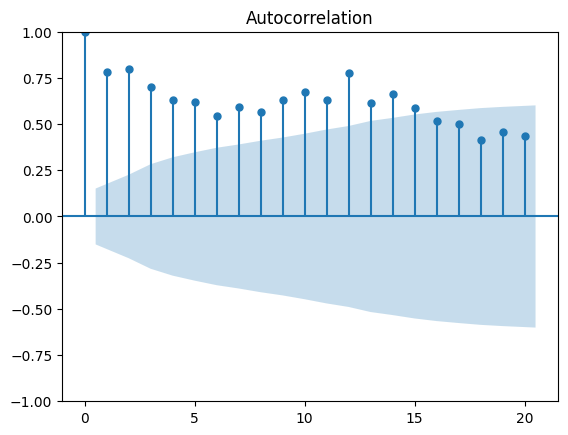

In [11]:
#Crear el gráfico de autocorrelacion (ACF)
#No tiene estacionariedad
plot_acf(births.Births, lags=20)

plt.show

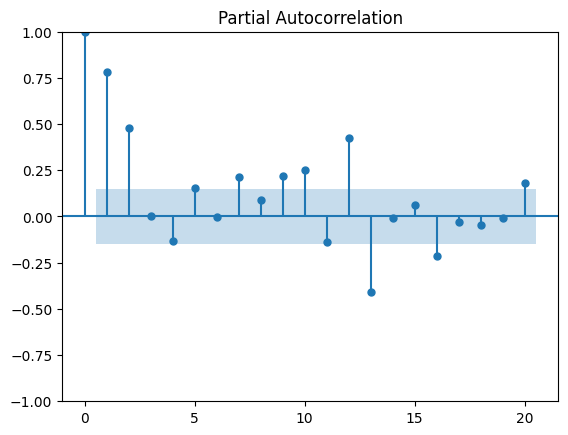

In [12]:
#Crear gráfica de autocorrelacion parcial (PACF)
plot_pacf(births.Births, lags=20)
plt.show()

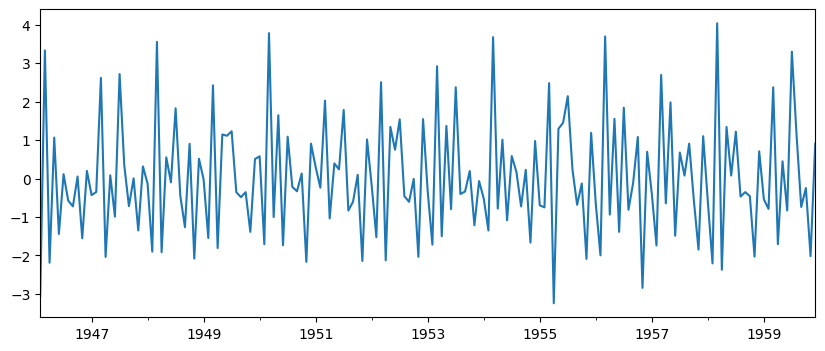

,Births
1946-02-28,-3.065
1946-03-31,3.333
1946-04-30,-2.191
1946-05-31,1.066
1946-06-30,-1.442
...,...
1959-08-31,1.135
1959-09-30,-0.739
1959-10-31,-0.249
1959-11-30,-2.020


In [13]:
#Transformar la serie estacionaria por diferenciación
births_diff = births.Births.diff().dropna()

plt.figure(figsize=(10, 4))

births_diff.plot()

plt.show()

births_diff

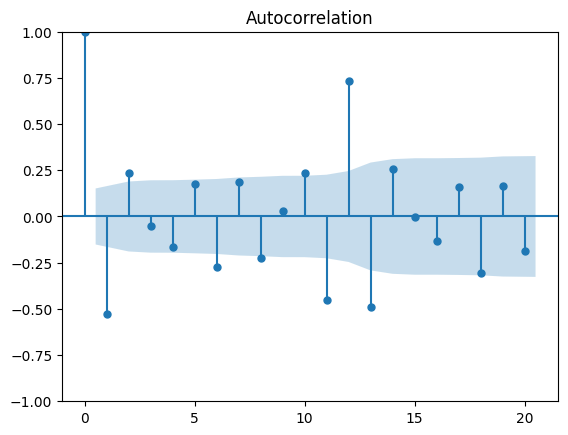

<function matplotlib.pyplot.show(close=None, block=None)>

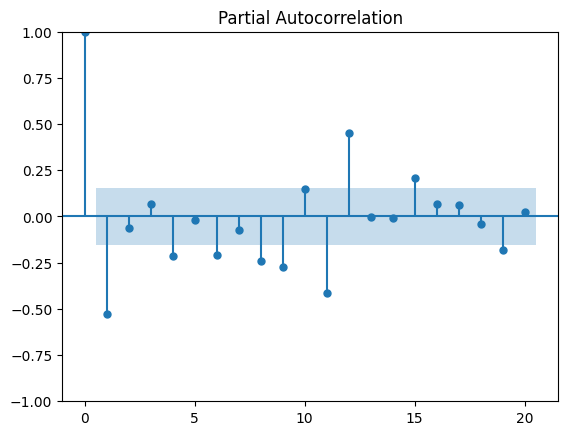

In [14]:
#Graficar ACF y PACF de la serie diferenciada
#p (AR),d ,q (MA)
plot_acf(births_diff, lags=20)
plt.show()

plot_pacf(births_diff, lags=20)
plt.show

In [15]:
#Generar el modelo ARIMA (p, 1, q)
arima_model = ARIMA(births.Births, order = (1,1,1))
fitARIMA = arima_model.fit()
fitARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                  168
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -277.042
Date:                Wed, 07 Jan 2026   AIC                            560.085
Time:                        06:50:28   BIC                            569.439
Sample:                    01-31-1946   HQIC                           563.881
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4810      0.175     -2.747      0.006      -0.824      -0.138
ma.L1         -0.0812      0.181     -0.448      0.654      -0.437       0.274
sigma2         1.6127      0.191      8.461      0.000       1.239       1.986
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.46
Prob(Q):                              0.94   Prob(JB):                         0.18
Heteroskedasticity (H):               1.33   Skew:                             0.33
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

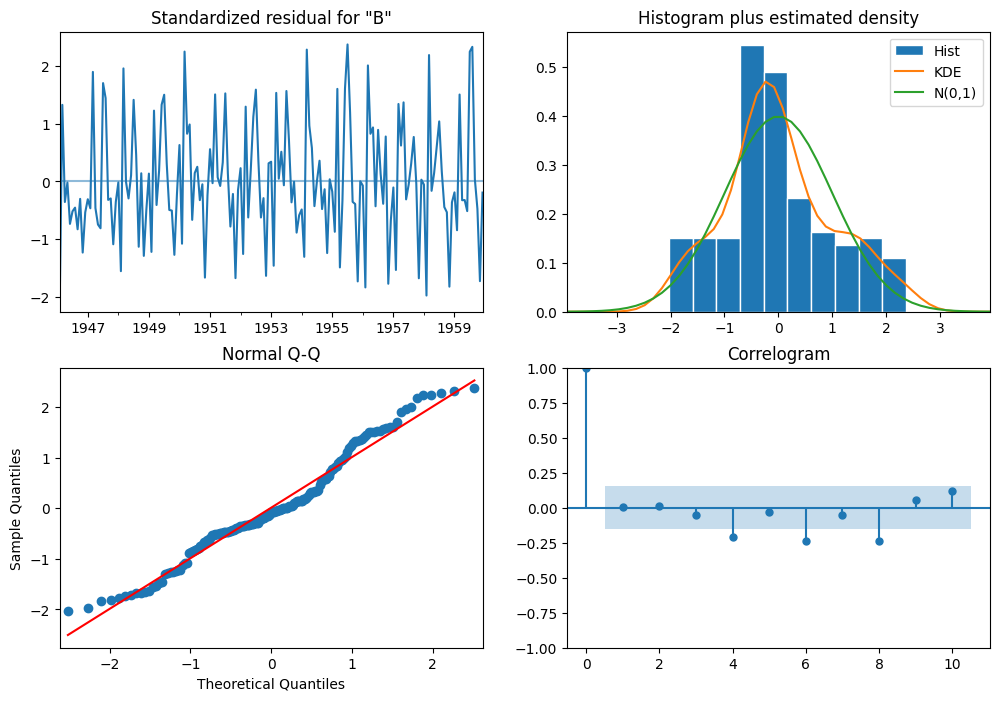

In [16]:
#Revisar estadísticos del modelo
fitARIMA.plot_diagnostics(figsize= (12,8))
plt.show()

In [17]:
#Predicciones a 12 meses

forecast_values = fitARIMA.forecast(steps=12)

forecast_values

,predicted_mean
1960-01-31,27.481537
1960-02-29,27.681384
1960-03-31,27.585253
1960-04-30,27.631494
1960-05-31,27.609251
1960-06-30,27.619951
1960-07-31,27.614804
1960-08-31,27.617280
1960-09-30,27.616089
1960-10-31,27.616662


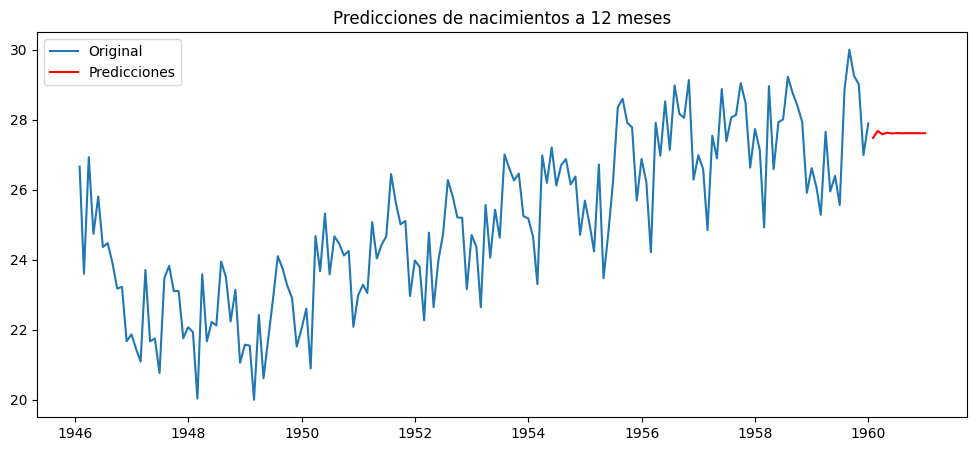

In [18]:
#Graficar las predicciones

plt.figure(figsize=(12,5))

plt.plot(births.index, births.Births, label='Original')

plt.plot(forecast_values.index, forecast_values, color='red', label='Predicciones')

plt.legend()

plt.title('Predicciones de nacimientos a 12 meses')

plt.show()

In [19]:
#Crear un modelo SARIMAX
#Que considere estacionalidad Anual
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(births.Births, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))

fit_sarima = model_sarima.fit()

fit_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Births   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -146.220
Date:                            Wed, 07 Jan 2026   AIC                            302.440
Time:                                    06:50:33   BIC                            317.254
Sample:                                01-31-1946   HQIC                           308.460
                                     - 12-31-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5277      0.297      1.778      0.075      -0.054       1.109
ma.L1         -0.7033      0.253     -2.776      0.006      -1.200      -0.207
ar.S.L24      -0.3083      0.112     -2.762      0.006      -0.527      -0.090
ma.S.L24      -0.7463      0.197     -3.794      0.000      -1.132      -0.361
sigma2         0.3633      0.061      6.002      0.000       0.245       0.482
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.59   Prob(JB):                         0.82
Heteroskedasticity (H):               1.24   Skew:                            -0.13
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
#Predecir los siguientes n periodos
periodos = 36
forecast_sarima = fit_sarima.forecast(steps=periodos)

forecast_sarima

,predicted_mean
1960-01-31,27.639925
1960-02-29,25.814327
1960-03-31,29.236412
1960-04-30,27.933171
1960-05-31,29.179203
1960-06-30,28.275928
1960-07-31,29.546251
1960-08-31,29.151243
1960-09-30,28.595068
1960-10-31,29.107913


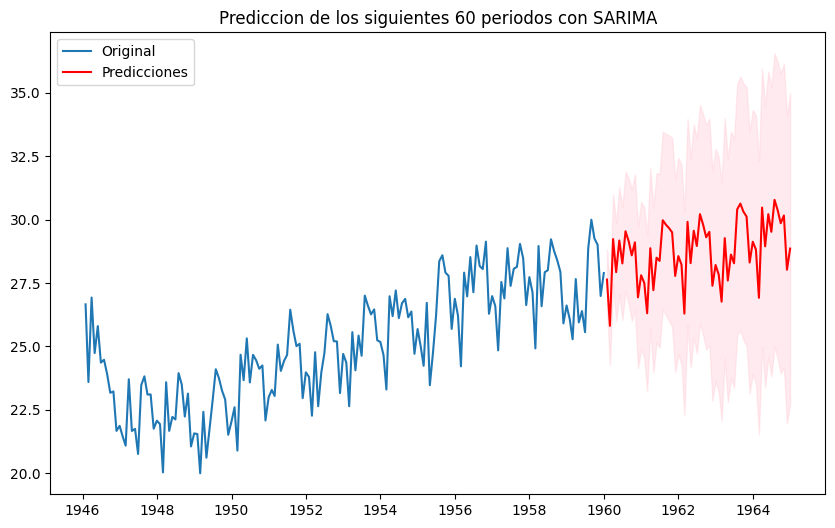

In [21]:
#Predecir los siguientes n periodos

periodos = 60

forecast_sarima = fit_sarima.get_forecast(steps=periodos)

forecast_sarima_mean = forecast_sarima.predicted_mean

forecast_sarima_conf_int = forecast_sarima.conf_int()

#Graficar las predicciones

plt.figure(figsize=(10,6))

plt.plot(births.Births, label='Original')

plt.plot(forecast_sarima_mean, label='Predicciones', color='red')

plt.fill_between(forecast_sarima_conf_int.index,

forecast_sarima_conf_int.iloc[:, 0],

forecast_sarima_conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.title(f"Prediccion de los siguientes {periodos} periodos con SARIMA")

plt.legend()

plt.show()

In [22]:
#Ver los valores predichos
forecast_sarima_mean

,predicted_mean
1960-01-31,27.639925
1960-02-29,25.814327
1960-03-31,29.236412
1960-04-30,27.933171
1960-05-31,29.179203
1960-06-30,28.275928
1960-07-31,29.546251
1960-08-31,29.151243
1960-09-30,28.595068
1960-10-31,29.107913
